In [1]:
import os
os.mkdir('dataset')


In [4]:
!unzip -o '/content/drive/My Drive/asl_alphabet.zip.zip' -d dataset


Streaming output truncated to the last 5000 lines.
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: dataset/asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: da

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten,Dropout
from keras.layers import Dense


classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(64, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(64,(3,3),activation='relu'))
classifier.add(Dropout(rate=0.1))
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 29, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/asl_alphabet_train/asl_alphabet_train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/asl_alphabet_train/asl_alphabet_train',
                                           target_size = (64, 64),
                                           batch_size = 32,
                                           class_mode = 'categorical')
batch_size=32
# checkpoint
from keras.callbacks import ModelCheckpoint
weightpath = "gdrive/My Drive/best_weights_project.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]



classifier.fit_generator(training_set,steps_per_epoch = 1000, epochs = 10, validation_data = testing_set, validation_steps = 800)

classifier.save_weights("/content/drive/My Drive/alphabet_trained_model.h5")
a=training_set.class_indices.keys()
a=list(a)





Found 87000 images belonging to 29 classes.
Found 87000 images belonging to 29 classes.
Epoch 1/10
1000/1000 [==============================] - 113s 113ms/step - loss: 2.1561 - accuracy: 0.3587 - val_loss: 0.6421 - val_accuracy: 0.8012
Epoch 2/10
1000/1000 [==============================] - 113s 113ms/step - loss: 0.7400 - accuracy: 0.7526 - val_loss: 0.2588 - val_accuracy: 0.9136
Epoch 3/10
1000/1000 [==============================] - 113s 113ms/step - loss: 0.4164 - accuracy: 0.8596 - val_loss: 0.1298 - val_accuracy: 0.9572
Epoch 4/10
1000/1000 [==============================] - 114s 114ms/step - loss: 0.2928 - accuracy: 0.9004 - val_loss: 0.0789 - val_accuracy: 0.9743
Epoch 5/10
1000/1000 [==============================] - 113s 113ms/step - loss: 0.2331 - accuracy: 0.9204 - val_loss: 0.0709 - val_accuracy: 0.9764
Epoch 6/10
1000/1000 [==============================] - 113s 113ms/step - loss: 0.1854 - accuracy: 0.9368 - val_loss: 0.0539 - val_accuracy: 0.9833
Epoch 7/10
1000/1000 [==

Populating the interactive namespace from numpy and matplotlib


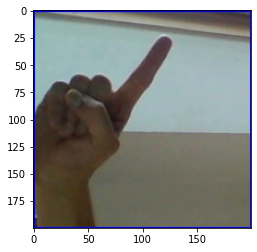

Model prediction of the image is:Z


In [41]:
import tensorflow as tf
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/dataset/asl_alphabet_train/asl_alphabet_train/Z/Z10.jpg')
imgplot = plt.imshow(img)
plt.show()
img = keras.preprocessing.image.load_img(
    "/content/dataset/asl_alphabet_train/asl_alphabet_train/Z/Z10.jpg", target_size=(64, 64, 3))
img_array = keras.preprocessing.image.img_to_array(img)

img_array = tf.expand_dims(img_array, 0)  

predictions = classifier.predict(img_array)
score = predictions[0]
pred = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for i in range(29):
  if score[i] == 1:
    print("Model prediction of the image is:{}".format(pred[i]))
    break


In [ ]:
|